In [6]:
#Adiabatic quantum computing gate of Ising model of number partitioning

from qiskit import QuantumCircuit, Aer, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
import numpy as np
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2.0*phi, q2)
    qc.cx(q1, q2)

cn = "Qp13-4"
ns = 4
tm = 10
dt = 0.1

qr = QuantumRegister(ns, 'qr')
cr = ClassicalRegister(ns, 'cr')
qc = QuantumCircuit(qr, cr)

for n in range(ns):
    qc.h(qr[n])

step = math.floor(tm / dt)
number = np.array([1, 2, 3, 4])
J = np.array([[0 for column in range(ns)] for row in range(ns)])
for i in range(ns):
    for j in range(ns):
        J[i][j] = number[i] * number[j]

print("J = " + str(J))

hx = -1.0
for n in range(step):
    s = n / step
    for i in range(ns):
        Rx(qc, -2.0 * (1 - s) * hx * dt, qr[i])
        for j in range(ns):
            if i < j:
                Rzz(qc, s * J[i][j] * dt, qr[i], qr[j])

for n in range(ns):
    qc.measure(qr[ns - 1 - n], cr[n])

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit, shots=1000)
result = simulator.run(qobj).result()

counts = result.get_counts()
print(counts)
plot_histogram(counts)

'''
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram
import math
def Rx(qci, theta, q):
    qci.u3(theta, -math.pi/2, math.pi/2, q)
def Rz(qci, phi, q):
    qci.u1(phi, q)
def Rzz(qci, phi, q1, q2):
    qci.cx(q1, q2)
    Rz(qci, -2.0*phi, q2)
    qci.cx(q1, q2)
qp = QuantumProgram()
cn = "Qp13-4"
ns = 4
tm = 10
dt = 0.1
qr = qp.create_quantum_register("qr", ns)
cr = qp.create_classical_register("cr", ns)
qc = qp.create_circuit(cn, [qr], [cr])
for n in range(0, ns):
    qc.h(qr[n])
step = math.floor(tm/dt)
number = np.array([1,2,3,4])
J = np.array([[0 for column in range(ns)] for row in range(ns)])
for i in range(0, ns):
    for j in range(0, ns):
        J[i][j] = number[i]*number[j]
print("J = "+str(J))
hx = -1.0
for n in range(0, step):
    s = n / step
    for i in range(0, ns):
        Rx(qc, -2.0*(1-s)*hx*dt, qr[i])
        for j in range(0, ns):
            if i < j:
                Rzz(qc, s*J[i][j]*dt, qr[i], qr[j])
for n in range(0, ns):
    qc.measure(qr[ns-1-n], cr[n])
r = qp.execute(cn, timeout = 6000, shots = 1000)
print(r.get_data(cn))
plot_histogram(r.get_counts(cn))
'''

J = [[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]
{'0100': 1, '0001': 6, '1011': 1, '0111': 4, '0011': 1, '1010': 11, '1110': 4, '0101': 15, '1000': 3, '1001': 504, '0110': 450}


/tmp/ipykernel_49400/383502954.py:56: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


'\nfrom qiskit import QuantumProgram\nfrom qiskit.tools.visualization import plot_histogram\nimport math\ndef Rx(qci, theta, q):\n    qci.u3(theta, -math.pi/2, math.pi/2, q)\ndef Rz(qci, phi, q):\n    qci.u1(phi, q)\ndef Rzz(qci, phi, q1, q2):\n    qci.cx(q1, q2)\n    Rz(qci, -2.0*phi, q2)\n    qci.cx(q1, q2)\nqp = QuantumProgram()\ncn = "Qp13-4"\nns = 4\ntm = 10\ndt = 0.1\nqr = qp.create_quantum_register("qr", ns)\ncr = qp.create_classical_register("cr", ns)\nqc = qp.create_circuit(cn, [qr], [cr])\nfor n in range(0, ns):\n    qc.h(qr[n])\nstep = math.floor(tm/dt)\nnumber = np.array([1,2,3,4])\nJ = np.array([[0 for column in range(ns)] for row in range(ns)])\nfor i in range(0, ns):\n    for j in range(0, ns):\n        J[i][j] = number[i]*number[j]\nprint("J = "+str(J))\nhx = -1.0\nfor n in range(0, step):\n    s = n / step\n    for i in range(0, ns):\n        Rx(qc, -2.0*(1-s)*hx*dt, qr[i])\n        for j in range(0, ns):\n            if i < j:\n                Rzz(qc, s*J[i][j]*dt, qr

J = [[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]
{'0010': 1, '0001': 7, '1110': 5, '0101': 6, '0100': 1, '0111': 6, '1010': 11, '0110': 455, '1100': 1, '1000': 4, '1001': 503}


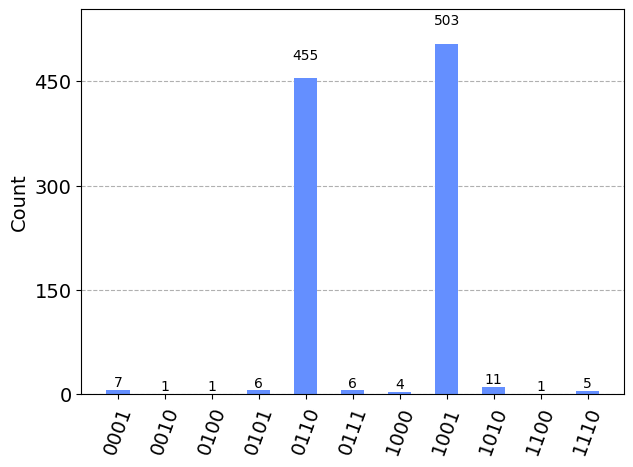

In [7]:
#V2 of #Adiabatic quantum computing gate of Ising model of number partitioning

from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2.0*phi, q2)
    qc.cx(q1, q2)

cn = "Qp13-4"
ns = 4 #量子ビットの数
tm = 10
dt = 0.1

qr = QuantumRegister(ns, 'qr')
cr = ClassicalRegister(ns, 'cr')
qc = QuantumCircuit(qr, cr)

for n in range(ns):
    qc.h(qr[n])

step = math.floor(tm / dt)
number = np.array([1, 2, 3, 4])
J = np.array([[0 for column in range(ns)] for row in range(ns)])
for i in range(ns):
    for j in range(ns):
        J[i][j] = number[i] * number[j]

print("J = " + str(J))

hx = -1.0
for n in range(step):
    s = n / step
    for i in range(ns):
        Rx(qc, -2.0 * (1 - s) * hx * dt, qr[i])
        for j in range(ns):
            if i < j:
                Rzz(qc, s * J[i][j] * dt, qr[i], qr[j])

for n in range(ns):
    qc.measure(qr[ns - 1 - n], cr[n])

simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()

counts = result.get_counts()
print(counts)
plot_histogram(counts)

J = [[25 20 15 10]
 [20 16 12  8]
 [15 12  9  6]
 [10  8  6  4]]
{'0000': 1, '0011': 1, '0100': 2, '0001': 6, '1111': 4, '0101': 38, '1110': 9, '1010': 45, '1001': 448, '0110': 446}


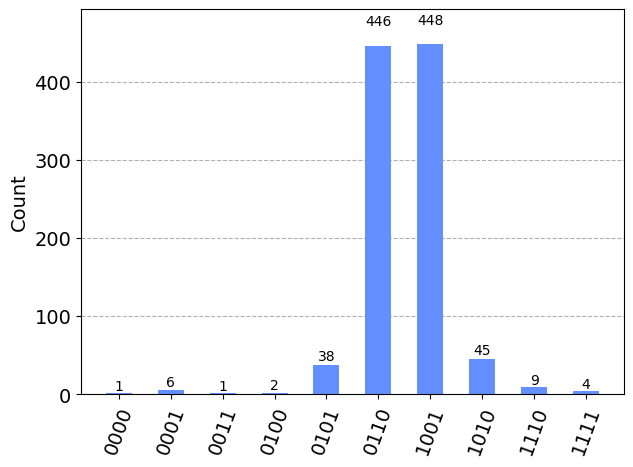

In [20]:
#V3 of #Adiabatic quantum computing gate of Ising model of number partitioning

from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2.0*phi, q2)
    qc.cx(q1, q2)

cn = "Qp13-4"
ns = int(input('Number of qubits = ')) #量子ビットの数
tm = 10
dt = 0.1

qr = QuantumRegister(ns, 'qr')
cr = ClassicalRegister(ns, 'cr')
qc = QuantumCircuit(qr, cr)

for n in range(ns):
    qc.h(qr[n])

step = math.floor(tm / dt)
n = int(input('n = '))
number = np.array([])
for k in range(1,n+1):
    number = np.append(number, int(input('The '+str(k)+'-th value is ')))
J = np.array([[0 for column in range(ns)] for row in range(ns)])
for i in range(ns):
    for j in range(ns):
        J[i][j] = number[i] * number[j]

print("J = " + str(J))

hx = -1.0
for n in range(step):
    s = n / step
    for i in range(ns):
        Rx(qc, -2.0 * (1 - s) * hx * dt, qr[i])
        for j in range(ns):
            if i < j:
                Rzz(qc, s * J[i][j] * dt, qr[i], qr[j])

for n in range(ns):
    qc.measure(qr[ns - 1 - n], cr[n])

simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()

counts = result.get_counts()
print(counts)
plot_histogram(counts)

{'0010': 1, '1101': 1, '0110': 1, '1000': 1, '0001': 508, '1110': 488}


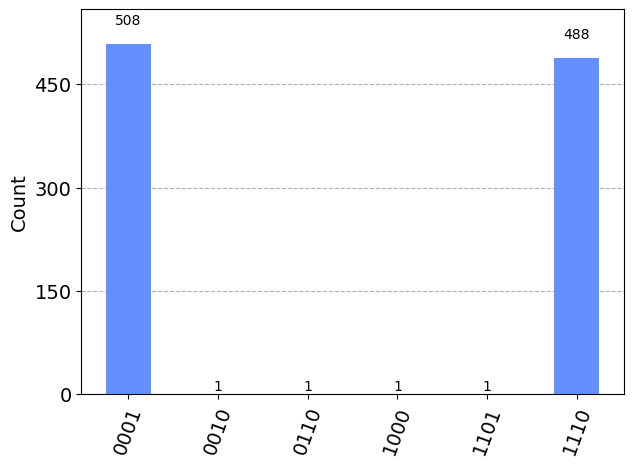

In [26]:
#Adiabatic quantum computing gate of Ising Hamiltonian of MaxCut problem
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)  # rzゲートに修正

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2*phi, q2)
    qc.cx(q1, q2)

cn = "Qp13-10"
ns = 4
tm = 10
dt = 0.1

qc = QuantumCircuit(ns, ns)  # QuantumCircuitを直接作成

for n in range(ns):
    qc.h(n)

step = math.floor(tm / dt)
hz = [0, 0, 0, 0]
J = [[0, 5, 6, 4],
     [5, 0, 2, 0],
     [6, 2, 0, 3],
     [4, 0, 3, 0]]
hx = 1.0

for n in range(step):
    s = n / step
    for i in range(ns):
        Rx(qc, -2*(1-s)*hx*dt, i)
        Rz(qc, -2*s*hz[i]*dt, i)
        for j in range(ns):
            if i < j:
                Rzz(qc, -s*J[i][j]*dt, i, j)

qc.measure(range(ns), range(ns))

backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

J = [[0. 5. 6. 4.]
 [5. 0. 2. 0.]
 [6. 2. 0. 3.]
 [4. 0. 3. 0.]]
{'1010': 1, '0001': 470, '1110': 529}


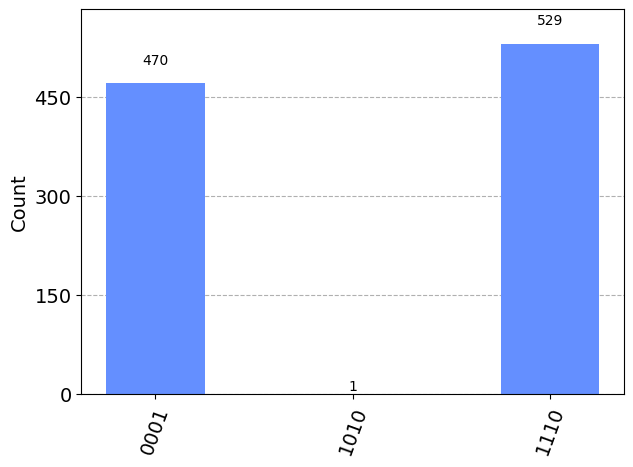

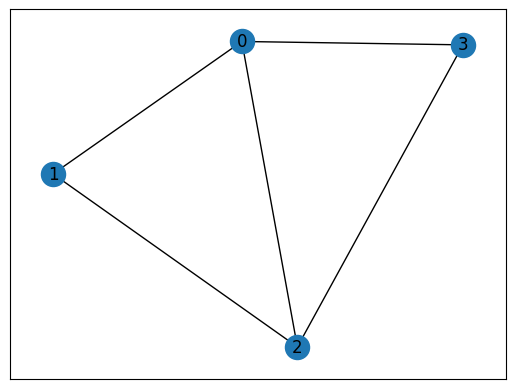

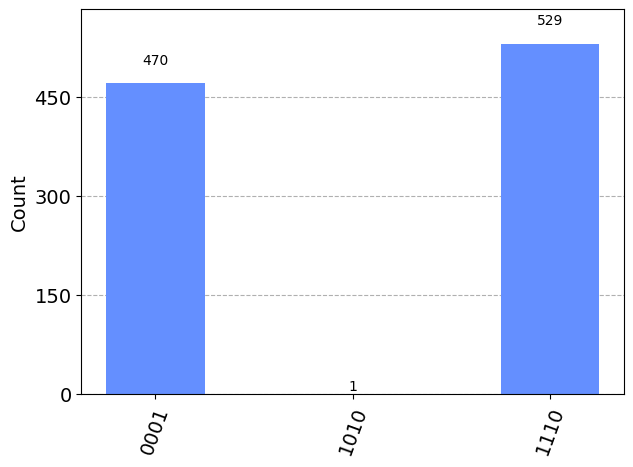

In [28]:
#V2 of #Adiabatic quantum computing gate of Ising Hamiltonian of MaxCut problem
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import networkx as nx
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2*phi, q2)
    qc.cx(q1, q2)

cn = "Qp13-10"
ns = 4
tm = 10
dt = 0.1

qc = QuantumCircuit(ns, ns)  # QuantumCircuitを直接作成

for n in range(ns):
    qc.h(n)

step = math.floor(tm / dt)
hz = [0, 0, 0, 0]

n = 4
g = nx.Graph()
g.add_nodes_from(np.arange(0,n,1))
e = [(0,1,5),(1,2,2),(2,3,3),(3,0,4),(0,2,6)]
g.add_weighted_edges_from(e)
nx.draw_networkx(g)
J = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        wt = g.get_edge_data(i,j,default=0)
        if wt != 0:
            J[i,j] = wt['weight']
print("J = "+str(J))

hx = 1.0

for n in range(step):
    s = n / step
    for i in range(ns):
        Rx(qc, -2*(1-s)*hx*dt, i)
        Rz(qc, -2*s*hz[i]*dt, i)
        for j in range(ns):
            if i < j:
                Rzz(qc, -s*J[i][j]*dt, i, j)

qc.measure(range(ns), range(ns))

backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

{'1010': 1, '0011': 1, '0111': 2, '1000': 2, '1110': 499, '0001': 495}


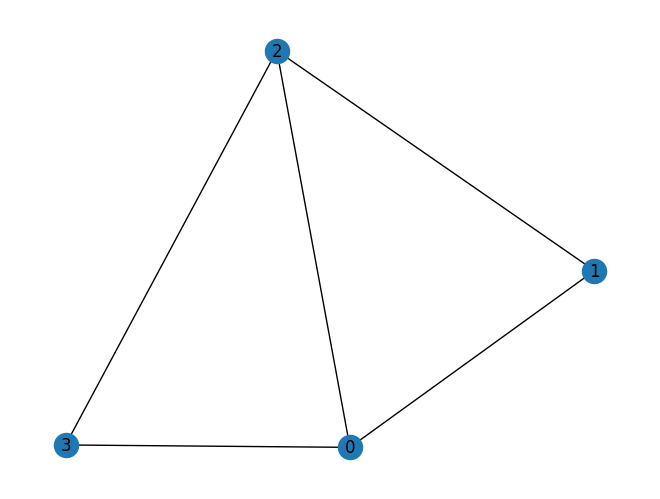

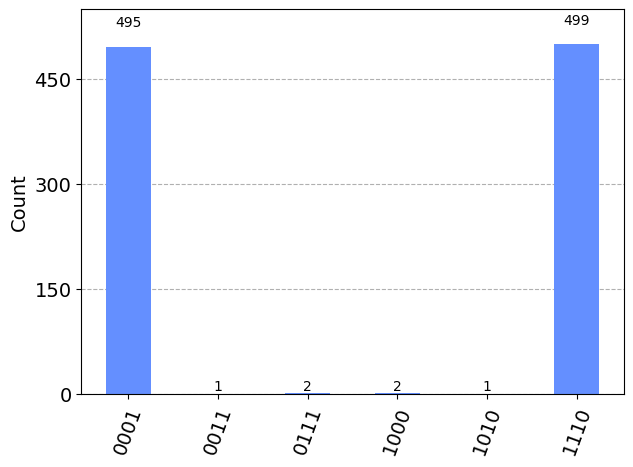

In [29]:
#V3 of #Adiabatic quantum computing gate of Ising Hamiltonian of MaxCut problem
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import networkx as nx
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2*phi, q2)
    qc.cx(q1, q2)

# 入力として頂点数と辺のリストを受け取る関数
def create_maxcut_circuit(num_nodes, edges, tm, dt):
    qc = QuantumCircuit(num_nodes, num_nodes)
    
    for n in range(num_nodes):
        qc.h(n)
    
    step = math.floor(tm / dt)
    hz = [0] * num_nodes
    
    J = np.zeros([num_nodes, num_nodes])
    for edge in edges:
        i, j, weight = edge
        J[i, j] = weight
        J[j, i] = weight
    
    hx = 1.0
    for n in range(step):
        s = n / step
        for i in range(num_nodes):
            Rx(qc, -2*(1-s)*hx*dt, i)
            Rz(qc, -2*s*hz[i]*dt, i)
            for j in range(i+1, num_nodes):  # i < j の条件を満たすように修正
                if J[i, j] != 0:
                    Rzz(qc, -s*J[i, j]*dt, i, j)
    
    qc.measure(range(num_nodes), range(num_nodes))
    return qc

# グラフの描画とIsing Hamiltonianの生成
def create_maxcut_graph_and_run(num_nodes, edges, tm, dt, shots=1000):
    g = nx.Graph()
    g.add_nodes_from(range(num_nodes))
    g.add_weighted_edges_from(edges)
    nx.draw(g, with_labels=True)
    
    qc = create_maxcut_circuit(num_nodes, edges, tm, dt)
    
    backend = Aer.get_backend('aer_simulator')
    job = execute(qc, backend, shots=shots)
    result = job.result()
    
    counts = result.get_counts(qc)
    print(counts)
    plot_histogram(counts)

# テスト用のグラフと実行
num_nodes = int(input('Number of vertices = '))
edges = [(0, 1, 5), (1, 2, 2), (2, 3, 3), (3, 0, 4), (0, 2, 6)]
tm = 10
dt = 0.1

create_maxcut_graph_and_run(num_nodes, edges, tm, dt)

{'0100': 1, '0010': 1, '0111': 1, '1000': 1, '0101': 3, '1110': 508, '0001': 485}


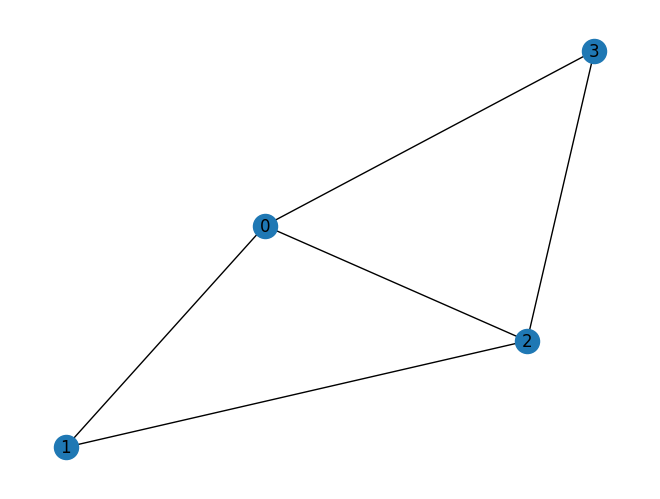

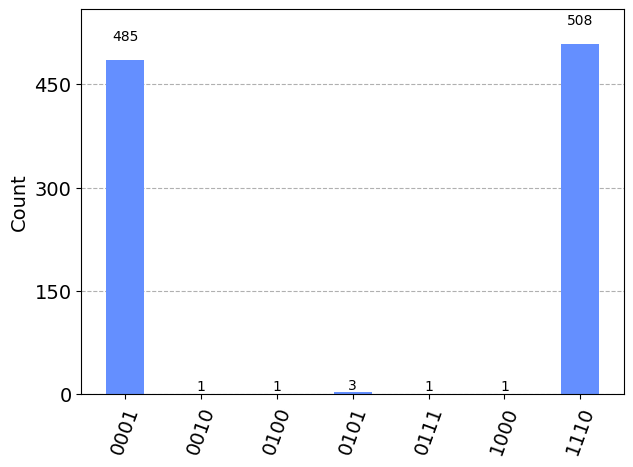

In [30]:
#V4 of #Adiabatic quantum computing gate of Ising Hamiltonian of MaxCut problem
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import networkx as nx
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2*phi, q2)
    qc.cx(q1, q2)

# 入力として頂点数と辺のリストを受け取る関数
def create_maxcut_circuit(num_nodes, edges, tm, dt):
    qc = QuantumCircuit(num_nodes, num_nodes)
    
    for n in range(num_nodes):
        qc.h(n)
    
    step = math.floor(tm / dt)
    hz = [0] * num_nodes
    
    J = np.zeros([num_nodes, num_nodes])
    for edge in edges:
        i, j, weight = edge
        J[i, j] = weight
        J[j, i] = weight
    
    hx = 1.0
    for n in range(step):
        s = n / step
        for i in range(num_nodes):
            Rx(qc, -2*(1-s)*hx*dt, i)
            Rz(qc, -2*s*hz[i]*dt, i)
            for j in range(i+1, num_nodes):  # i < j の条件を満たすように修正
                if J[i, j] != 0:
                    Rzz(qc, -s*J[i, j]*dt, i, j)
    
    qc.measure(range(num_nodes), range(num_nodes))
    return qc

# グラフの描画とIsing Hamiltonianの生成
def create_maxcut_graph_and_run(num_nodes, edges, tm, dt, shots=1000):
    g = nx.Graph()
    g.add_nodes_from(range(num_nodes))
    g.add_weighted_edges_from(edges)
    nx.draw(g, with_labels=True)
    
    qc = create_maxcut_circuit(num_nodes, edges, tm, dt)
    
    backend = Aer.get_backend('aer_simulator')
    job = execute(qc, backend, shots=shots)
    result = job.result()
    
    counts = result.get_counts(qc)
    print(counts)
    plot_histogram(counts)

# ユーザーからの入力で頂点数と辺の情報を取得
def get_input_from_user():
    num_nodes = int(input("頂点数を入力してください: "))
    edges = []
    while True:
        edge_input = input("辺の情報を入力してください (例: '0 1 5'、終了する場合は空行を入力): ")
        if edge_input.strip() == "":
            break
        else:
            i, j, weight = map(int, edge_input.split())
            edges.append((i, j, weight))
    
    return num_nodes, edges

# メイン処理
def main():
    num_nodes, edges = get_input_from_user()
    tm = 10
    dt = 0.1
    
    create_maxcut_graph_and_run(num_nodes, edges, tm, dt)

if __name__ == "__main__":
    main()